# [POLSCI-5] Immigration

Estimated Time: 30-40 minutes <br>
Created by: Lauren Hom, Ravi Singhal

Today we will be examining three data sets on immigration to the United States, where these datasets were created from data collected by the United States Department of Homeland Security. We are going to analyze ecomomic and immigration patterns in North and South America and tie them to the events that were taking place at that time.

### Table of Contents 
* [Jupyter Introduction ](#0) <br>
* [The Datasets](#1)<br>
* [Table 1: Immigrants to the U.S.](#2)<br>
    * [Columns](#2a)<br>
    * [Rows](#2b)<br>
    * [Mexico](#2c)<br>
    * [Central America](#2d)<br>
* [Table 2: U.S. Immigrants by Last Residence](#3)<br>
    * [Columns and Rows](#3a)<br>
    * [Mexico](#3b)<br>
* [Table 3: Immigration by Class of Admission](#4)<br>
    * [Columns](#4a)<br>
    * [Rows](#4b)<br>
    * [Mexico](#4c)<br>
    * [Exploration of Central America and Mexico](#4d)<br>

# Jupyter Introduction <a id='0'></a>

This webpage is a Jupyter Notebook. **Notebooks** are documents that can contain text, code, visualizations, and more. 

A notebook is composed of rectangular sections called **cells**. There are 2 kinds of cells: markdown and code. A **markdown cell**, such as this one, contains text. A **code cell** contains code in Python, a programming language that we will be using for the remainder of this module. You can select any cell by clicking it once. After a cell is selected, you can navigate the notebook using the up and down arrow keys.

To run a code cell once it's been selected, 
- press `Shift + Enter`, or
- click the `▶| Run` button in the toolbar at the top of the screen. 

If a code cell is running, you will see an asterisk (\*) appear in the square brackets to the left of the cell. Once the cell has finished running, a number will replace the asterisk and any output from the code will appear under the cell. 

An example of a code cell is below. Try running it. If everything works properly, the word "Success" should be printed under the cell.

In [1]:
# This cell sets up the notebook. Just run this cell.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

print("Success!")

Success!


# The Datasets <a id='1'></a>

The three tables (datasets) contain information about immigration to the United States. Here is a description of the data as stated on the United States Department of Homeland Security:

> "The 2017 Yearbook of Immigration Statistics is a compendium of tables that provide data on foreign nationals who are granted lawful permanent residence (i.e., immigrants who receive a “green card”), admitted as temporary nonimmigrants, granted asylum or refugee status, or are naturalized. The Yearbook also presents data on immigration enforcement actions, including apprehensions and arrests, removals, and returns"

The three datasets we will be looking at contain data on:
- Foreign nationals granted lawful permanent residence (i.e., immigrants who receive a “green card”) 
- Immigration enforcement actions 

<br>If you want to read more about the dataset, click [here](https://www.dhs.gov/immigration-statistics/yearbook/2017).


# Table 1: Immigrants to the U.S. <a id='2'></a>

The first table we will explore contains data on the number of immigrants who obtained lawful permanent residence or received a "green card" to the U.S. on a temporary basis between 1989-2017 for a given country. The people represented in total numbers are people who were **born** in the specified country.

Here are the first 5 rows of the table. There are 5925 rows and 3 columns.

In [2]:
birth_country = Table.read_table('ImmigrantsRegionCountry.csv') # read in the dataset
birth_country.show(5)

fiscal_year,country,total
1989,Afghanistan,3232
1989,Albania,71
1989,Algeria,230
1989,American Samoa,1
1989,Andorra,4


## Columns <a id='2a'></a>

First, let's examine what a *column* is. There are a total of 3 columns in this table:
- `fiscal_year` - years range from 1989-2017
- `country` - country/region where immigrants came from
- `total` - the total number of immigrants for a given fiscal year

In [3]:
birth_country.show(5)

fiscal_year,country,total
1989,Afghanistan,3232
1989,Albania,71
1989,Algeria,230
1989,American Samoa,1
1989,Andorra,4


Here are some of the countries and regions in the table. There are a total of 240 countries and regions represented in the table. The table below shows the number of occurances of each country in the original table.

In [4]:
#Run this cell to display the first 10 countries and regions in the table
countries_regions = birth_country.group('country')
countries_regions.show(10)

country,count
Afghanistan,29
Albania,29
Algeria,29
American Samoa,19
Andorra,8
Angola,29
Anguilla,29
Antigua-Barbuda,29
Argentina,29
Armenia,26


## Rows <a id='2b'></a>

Second, let's examine what a *row* is. Each row in the table gives the total number of immigrants admitted during the specific fiscal year for a given country.

For example, here is the first row of the table. This row shows that there were 3232 immigrants who were granted lawful permanent residence from Afghanistan in 1989.

In [5]:
birth_country.take(0)

fiscal_year,country,total
1989,Afghanistan,3232


Let's look at the data more closely for a specific country.

## Mexico <a id='2b'></a>

We will specifically look at data for Mexico, paying particular attention to the total before and after 2008. We are going to examine the LPR (Persons Obtaining Lawful Permanent Resident Status).

First, let's filter the overall table so that we only have a subset of the data-- data on only Mexico.

In [6]:
#Shows only the data for the country Mexico 
mexico = birth_country.where('country', 'Mexico')
mexico.show(29)

fiscal_year,country,total
1989,Mexico,405172
1990,Mexico,679068
1991,Mexico,946167
1992,Mexico,213802
1993,Mexico,126561
1994,Mexico,111398
1995,Mexico,89932
1996,Mexico,163572
1997,Mexico,146865
1998,Mexico,131575


The table above shows just the rows that have Mexico in them, allowing us to see the trend in LPR over time much easier.

### Visualize the Data 

Using the data above, we can take a look at the change in the number of immigrants by plotting it over time from 1989-2017.

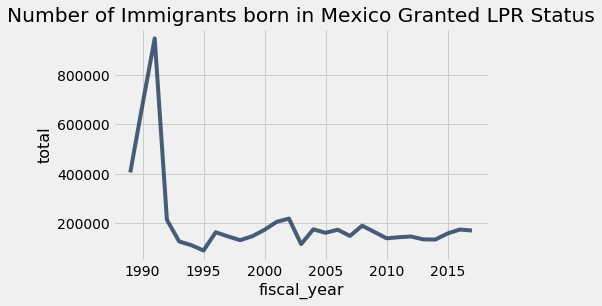

In [7]:
mexico.plot('fiscal_year', 'total') #generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Number of Immigrants born in Mexico Granted LPR Status') #titles the plot
plt.show()

Let's take a look at the highest and lowest points that appear in the graph. 

In [8]:
# Row with the MINIMUM total immigration in Mexico
lowest_total = min(mexico.column('total')) 
mexico.where('total', lowest_total)

fiscal_year,country,total
1995,Mexico,89932


The table above shows the one row with the lowest number of immigrants granted LPR in Mexico. In comparison, table below shows the one row with the highest number of immigrants granted LPR. By comparing the two `total` values with the data shown in the plot above, we can see that the highest total seems to be significantly higher than most of the other data points.

In [9]:
# Row with the MAXIMUM total immigration in Mexico
highest_total = max(mexico.column('total'))
mexico.where('total', highest_total)

fiscal_year,country,total
1991,Mexico,946167


Here is the data from the table showing the total number of immigrants granted lawful permanent status between 2008-2017:

In [10]:
mexico.where('fiscal_year', are.between_or_equal_to(2008, 2017))

fiscal_year,country,total
2008,Mexico,189989
2009,Mexico,164920
2010,Mexico,139120
2011,Mexico,143446
2012,Mexico,146406
2013,Mexico,135028
2014,Mexico,134052
2015,Mexico,158619
2016,Mexico,174534
2017,Mexico,170581


### Discussion 1

With a partner, discuss the following:

What was happening in Mexico and/or internationally in 1995, 1991, and 2008? How might this explain why the total number of immigrants granted lawful permanent status followed the trends displayed in the line plot?

**Solution**: 

- 1995: Mexico Peso Crisis
- 1991: **Not actually sure what historically significantly happened here with respec to economics or other factors, if anything**
- 2008: US Financial Crisis

Answers to the second question may vary


## Central America <a id='2d'></a>

Let's also take a look at the total number of immigrants granted lawful permanent status for Honduras, El Salvador, and Guatemala.

In [11]:
honduras = birth_country.where('country', 'Honduras').relabel('total', 'Honduras total')

el_salvador = birth_country.where('country', 'El Salvador').relabel('total', 'El Salvador total')

guatemala = birth_country.where('country', 'Guatemala').relabel('total', 'Guatemala total')
guatemala.show(3)

fiscal_year,country,Guatemala total
1989,Guatemala,19049
1990,Guatemala,32303
1991,Guatemala,25527


Next we will combine the three subsets of data.

In [12]:
latin_countries = honduras.join('fiscal_year', el_salvador).join('fiscal_year', guatemala)
latin_countries = latin_countries.drop('country', 'country_2', 'country_3')
latin_countries

fiscal_year,Honduras total,El Salvador total,Guatemala total
1989,7593,57878,19049
1990,12024,80173,32303
1991,11451,47351,25527
1992,6552,26191,10521
1993,7306,26818,11870
1994,5265,17644,7389
1995,5496,11744,6213
1996,5870,17903,8763
1997,7616,17969,7785
1998,6463,14590,7759


Now we can create a line plot of the number of immigrants granted lawful permanent residence for each country.

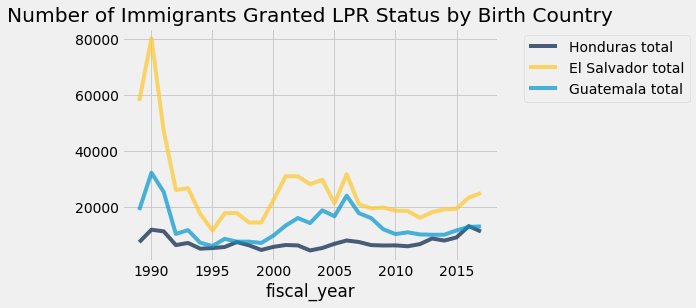

In [13]:
latin_countries.plot('fiscal_year')
plt.title('Number of Immigrants Granted LPR Status by Birth Country')
plt.show()

### Discussion 1.2

With a partner discuss the following:

What is similar and different about the trends in immigration between Honduras, El Salvador, and Guatemala? How do they compare with the immigration trends in Mexico? Why might these similarities and differences be occurring? 

# Table 2: U.S. Immigrants by Last Residence <a id='3'></a>

The second table we will explore also contains data on the number of immigrants who obtained lawful permanent residence or received a "green card" to the U.S. on a temporary basis between 1994-2017 for a given country. 
This time, the people represented in total numbers are people whose **last permanent residence** was in the given country (e.g. this could include people born in the country, people who immigrated to the given country from another country, etc.).

The first 5 rows of the data are shown, below. There are 1491 rows and 4 columns.

In [14]:
permanent_residence = Table.read_table('lawfulPermResidentByCountryLastResidence.csv') #read in the dataset
permanent_residence.show(5)

country,fiscal_year,total,Unnamed: 3,Unnamed: 4
Argentina,1994,2474,nan,nan
Argentina,1995,2239,nan,nan
Argentina,1996,2878,nan,nan
Argentina,1997,2055,nan,nan
Argentina,1998,1649,nan,nan


As you can see, there are two columns in the table with "nan" (not a number) values, meaning  indicates not applicable or missing value. We have cleaned the dataset to include only the columns needed for analysis. The cleaned dataset has 3 columns, like the previous original table. 

In [16]:
permanent_residence = permanent_residence.drop('Unnamed: 3', 'Unnamed: 4') # removes the specified column lablels
permanent_residence.show(5)

country,fiscal_year,total
Argentina,1994,2474
Argentina,1995,2239
Argentina,1996,2878
Argentina,1997,2055
Argentina,1998,1649


## Columns and Rows <a id='3a'></a>
Like the previous table we just explored (`birth_country`), there are a total of 3 columns in this table. This table is almost the same as the first one, except that the `total` column represents the total number of immigrants granted lawful permanent resident status or a green card to the U.S.

Here are some of the countries and regions represented in this table.

In [36]:
#Run this cell to display the first 15 countries and regions in the table
permanent_residence.group('country').show(5)

country,count
Argentina,24
Australia,17
Austria,24
Austria-Hungary,24
Belgium,24


Also like the previous table, each row in the table gives the total number of immigrants admitted during the specific fiscal year for a given country.

For example, here is the first row in the table. It shows that in 1994 there were a total of 2474 permanent residence in Argentina who were granted lawful permanent residence.

In [18]:
permanent_residence.take(0)

country,fiscal_year,total
Argentina,1994,2474


Let's explore a subset of the data again with Mexico.

## Mexico <a id='3b'></a>

Once again, let's look at just the rows containing information on Mexico.

In [20]:
mexico_residence = permanent_residence.where('country', 'Mexico') #Shows only the data for the country Mexico 
mexico_residence.show(5)

country,fiscal_year,total
Mexico,1994,111415
Mexico,1995,90045
Mexico,1996,163743
Mexico,1997,146680
Mexico,1998,130661


### Visualizing the Data
Here is a line plot of the number of immigrants who were granted lawful permanent residence from 1994-2017.

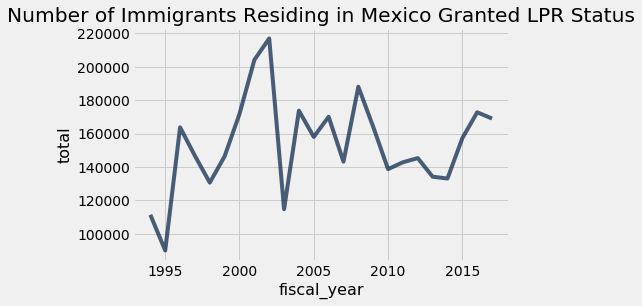

In [21]:
mexico_residence.plot('fiscal_year', 'total') #generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Number of Immigrants Residing in Mexico Granted LPR Status')
plt.show()

This can be compared to the previously shown lineplot of the number of immigrants born in Mexico who were granted lawful permanent residence. 

Here is that previous lineplot shown from 1994-2017

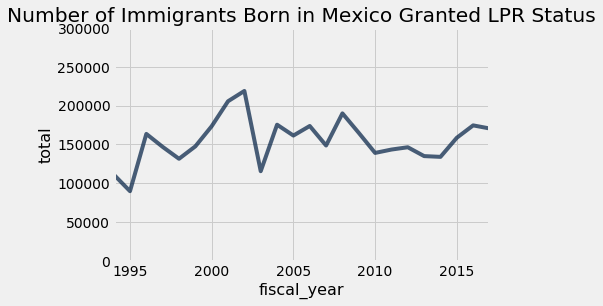

In [22]:
mexico.plot('fiscal_year', 'total') #generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Number of Immigrants Born in Mexico Granted LPR Status') #titles the plot
plt.xlim(1994, 2017) #Shows the plot from x = 1994 to 2017
plt.ylim(0, 300000) #Shows the plot from y = 0 to 300000
plt.show()

# Table 3: Immigration by Class of Admission <a id='4'></a>

The final table we will explore provides information on the type of admission (class) immigrants granted lawful permanent residence received. The Department of Homeland Security describes the Immigrant Classes of Admissions, below:

> "A lawful permanent resident (LPR) or “green card” recipient may live and work anywhere in the United States and may apply to become U.S. citizens if they meet certain eligibility and admissibility requirements. The Immigration and Nationality Act (INA) provides several broad classes of admission for foreign nationals to gain LPR status, the largest of which focuses on admitting immigrants for the purpose of family reunification. Other major categories include economic and humanitarian immigrants, as well as immigrants from countries with relatively low levels of immigration to the United States." ([U.S. Department of Homeland Security](https://www.dhs.gov/immigration-statistics/lawful-permanent-residents/ImmigrantCOA))

Here are the first 5 rows of the table. There are 20907 rows and 4 columns.

In [23]:
class_admission = Table.read_table('immigrants-class-perm.csv') # read in the dataset
class_admission.show(5)

country,type,fiscal_year,total
Afghanistan,Cancellation of Removal,1999,6
Afghanistan,Cancellation of Removal,2000,7
Afghanistan,Cancellation of Removal,2001,3
Afghanistan,Cancellation of Removal,2002,1
Afghanistan,Cancellation of Removal,2004,5


## Columns <a id='4a'></a>

There is an additional column in this table: `type`. The `type` refers to the class immigrants were admitted with to be granted lawful permanent residence. There are a total of 9 types or classes in the table.

In [24]:
# Run this cell to display all of the "types" of classes in the table, sorted by the type with the most occurences 
types = class_admission.group('type').sort('count', descending = True) 
types

type,count
Immediate relatives of U.S. citizens,4046
Employment-based preferences,3594
Family-sponsored preferences,3418
Diversity,3179
Refugees and asylees,3115
Other,2673
Cancellation of Removal,658
IRCA legalization,131
Suspension of Deportation,93


### Discussion 2

With a partner, choose two types that you are unsure about. Each partner should look up one of the types [here](https://www.dhs.gov/immigration-statistics/lawful-permanent-residents/ImmigrantCOA). Then briefly discuss what the types mean.

**Cancellation of removal, IRCA legalization, and Suspension of Deportation not in the link? May need to just state for them instead of having them do a discussion**

## Rows <a id='4b'></a>

Finally, each *row* in the table gives the total number of immigrants admitted under the stated class for a given country in a particular year. 

For example, here is the first row of the dataset. This row shows that there were 6 immigrants who were granted lawful permanent residence from Afghanistan in 1999 for the "Cancelation of Removal" class. 

In [25]:
class_admission.take(0) #takes the first row of the table

country,type,fiscal_year,total
Afghanistan,Cancellation of Removal,1999,6


Let's take a look at the data for Mexico again with this Class of Admission table.

## Mexico <a id='4c'></a>

Once again, we will take a subset of the data from the overall Class by Admission table.

Run the cell below to see the subset of data of Mexico. The subset of data for Mexico shows data from 1997-2017.

In [26]:
#Shows only data for the Class Admission of Mexico
mexico_class = class_admission.where('country', 'Mexico')
mexico_class.show(5)

country,type,fiscal_year,total
Mexico,Cancellation of Removal,1998,103
Mexico,Cancellation of Removal,1999,4119
Mexico,Cancellation of Removal,2000,2321
Mexico,Cancellation of Removal,2001,2126
Mexico,Cancellation of Removal,2002,1908


Run the cell below to see which type has the highest total of immigrants across the years 1997-2017.

In [27]:
#Shows the total number of immigrants admitted under each group across the years in the table
#First groups the types from Mexico, summing all of the remaining columns
#Drops the columns that cannot be summed, like country and fiscal_year
#Sorts the types by total sum
mexico_class.group('type', sum).drop(1,2).sort('total sum', descending = True)

type,total sum
Immediate relatives of U.S. citizens,1953970
Family-sponsored preferences,1120030
Employment-based preferences,149303
Other,85260
Cancellation of Removal,16281
Refugees and asylees,9472
IRCA legalization,3990
Suspension of Deportation,1169
Diversity,327


### Visualize the Data

Let's plot the total number of immigrants for the top three types: Immediate relatives of U.S. citizens, Family-sponsored references, and Employment-based preferences.

Run the cell below to extract the three subsets of data. The subset of data for Employment-based preferences should display for you.

In [28]:
# filter Mexico data by type
immediate = mexico_class.where('type', 'Immediate relatives of U.S. citizens')
family = mexico_class.where('type', 'Family-sponsored preferences')
employment = mexico_class.where('type', 'Employment-based preferences')
employment.show(5)

country,type,fiscal_year,total
Mexico,Employment-based preferences,1997,3548
Mexico,Employment-based preferences,1998,3622
Mexico,Employment-based preferences,1999,2563
Mexico,Employment-based preferences,2000,3820
Mexico,Employment-based preferences,2001,7234


Next we will combine the three subsets of data. 



In [35]:
grouped = immediate.join('fiscal_year', family).join('fiscal_year', employment) #combines our three separate subsets of data
grouped = grouped.drop('country', 'country_2', 'country_3', 'country_4', 'type', 'type_2', 'type_3') #removes unwanted columns from our table
grouped.relabel('total', 'Immediate relatives of U.S. citizens').relabel('total_2', 'Family-sponsored preferences').relabel('total_3', 'Employment-based preferences')
grouped.show(5)

fiscal_year,Immediate relatives of U.S. citizens,Family-sponsored preferences,Employment-based preferences
1997,55544,99174,3548
1998,71320,55001,3622
1999,70015,69442,2563
2000,87826,77289,3820
2001,121627,73272,7234


Now we can visualize our combined subsetes of data. Here is a line plot of the number of immigrants granted a green card, separated by class admission

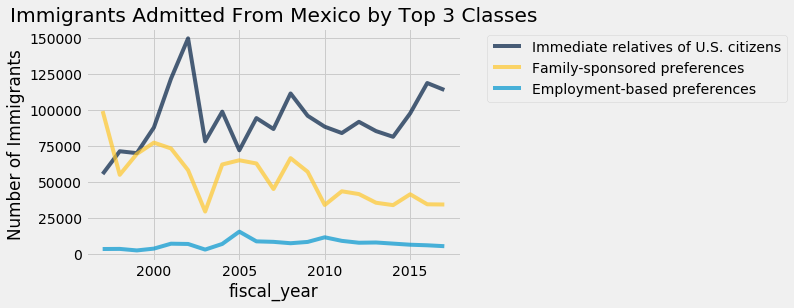

In [30]:
grouped.plot('fiscal_year') # generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Immigrants Admitted From Mexico by Top 3 Classes') # titles the plot
plt.ylabel("Number of Immigrants")
plt.show()

Here are the separate plots for each class, which may make it easier for you to observe trends. *Please note the differences on the y-axis for each individual plot*.

**Cut these out and just show the table and combined visualization?**

### Discussion 3

What trends in the plots and/or table surprised you, if anything? Why might certain trends be occurring during specific time frames for different class admissions?

## Exploration of Central American Countries and Mexico <a id='4d'></a>

Finally we will look at the number of immigrants admitted under the "Refugees and asylees" class for Mexico, Honduras, Venezuela, and Colombia.

In [31]:
# filter data by country
mexico_refugee = class_admission.where('country', 'Mexico').where('type', 'Refugees and asylees').drop(0, 1).relabel('total', 'Mexico total')
honduras_refugee = class_admission.where('country', 'Honduras').where('type', 'Refugees and asylees').drop(0, 1).relabel('total', 'Honduras total')
venezuela_refugee = class_admission.where('country', 'Venezuela').where('type', 'Refugees and asylees').drop(0, 1).relabel('total', 'Venezuela total')
colombia_refugee = class_admission.where('country', 'Colombia').where('type', 'Refugees and asylees').drop(0, 1).relabel('total', 'Colombia total')
colombia_refugee.show(5)

fiscal_year,Colombia total
1997,118
1998,169
1999,118
2000,212
2001,211


The final table for the subset of data for Columbia is displayed above.

Let's combine all the data for each country into one table to make it easier to compare the values across countries.

In [32]:
latin_refugees = honduras_refugee.join('fiscal_year', venezuela_refugee).join(
    'fiscal_year', colombia_refugee).join('fiscal_year', mexico_refugee)
latin_refugees.show(5)

fiscal_year,Honduras total,Venezuela total,Colombia total,Mexico total
1997,121,185,118,69
1998,107,137,169,50
1999,48,128,118,44
2000,62,216,212,64
2001,124,195,211,83


Finally, we can create the line plot of the total number of immigrants admitted under the "Refugees and Asylees" class from 1994-2017 by country.

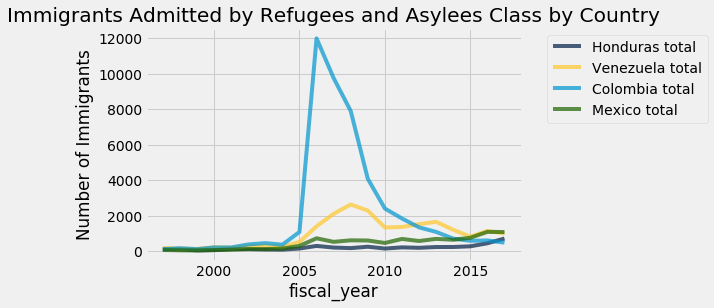

In [33]:
latin_refugees.plot('fiscal_year')
plt.title('Immigrants Admitted by Refugees and Asylees Class by Country')
plt.ylabel("Number of Immigrants")
plt.show()

Here is a closer view of the plot above.

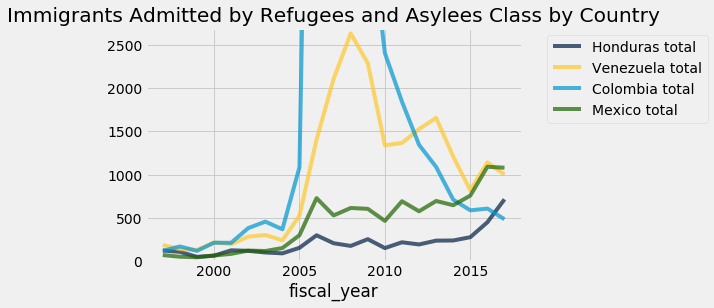

In [34]:
latin_refugees.plot('fiscal_year') #generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Immigrants Admitted by Refugees and Asylees Class by Country') # Titles the plot
plt.ylim(0, 2700) #Shows the plot from y= 0 to 2700
plt.show()

# Data Science Opportunities at UC Berkeley
If you are interested in data science, we offer several courses and even a major / minor here at UC Berkeley. Some great courses to start out are Data 8 and some 2 unit connector courses like History 88 and Demography 88. For the full list of courses we offer, click [here](https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings).

# Bibliography
1. https://www.dhs.gov/immigration-statistics/yearbook/2017/table21